# Survey and twiss around IPs

###  Beam Position in lab frame


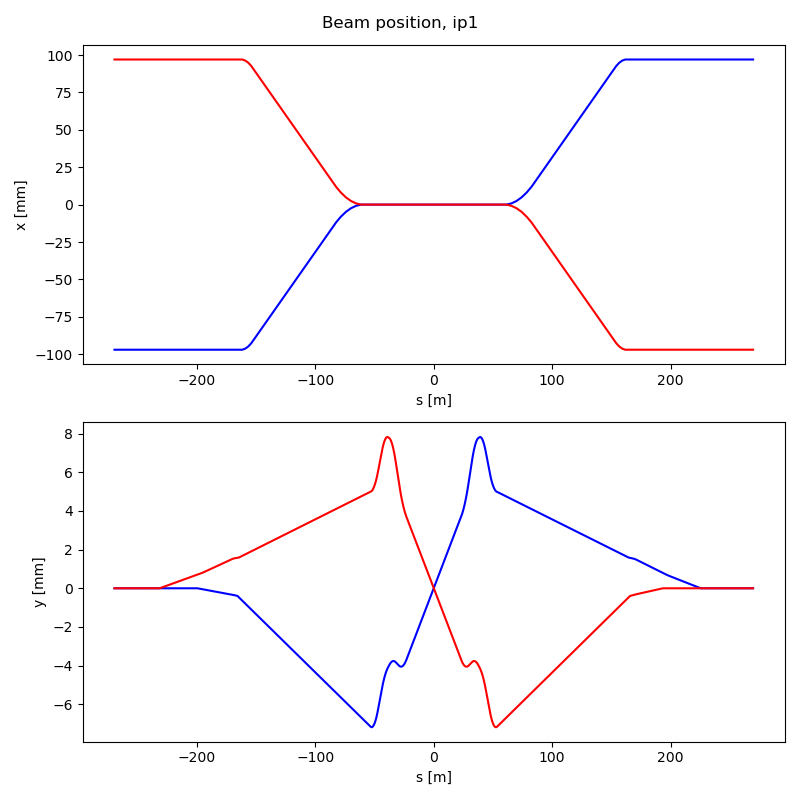

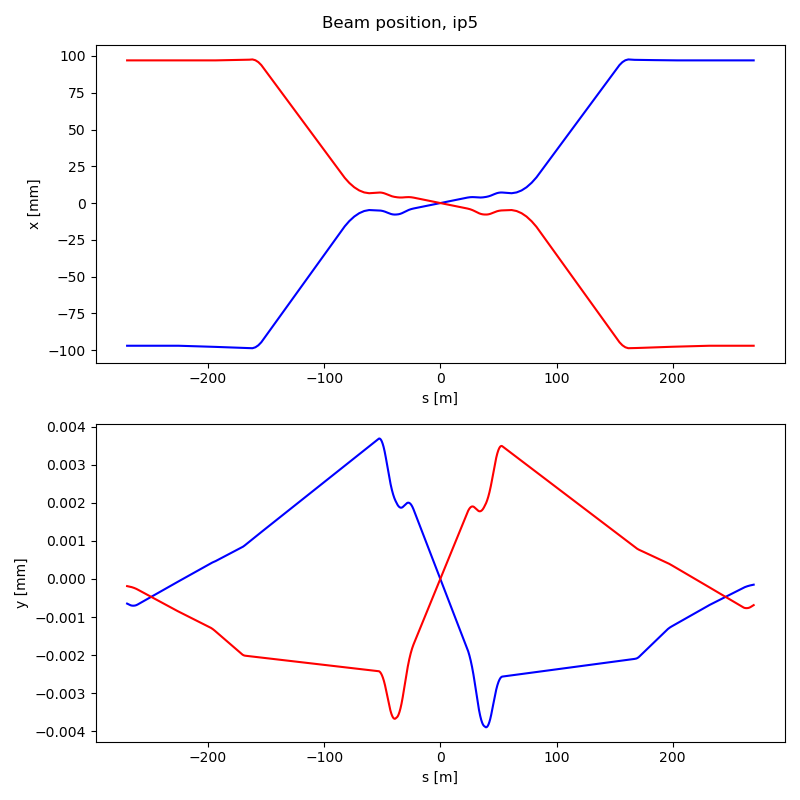

In [1]:
%matplotlib widget
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import Backend.InteractionPoint as inp


# Importing twiss and survey
twiss_b1  = pd.read_pickle('LHC_sequence/lhcb1_twiss.pkl')
survey_b1 = pd.read_pickle('LHC_sequence/lhcb1_survey.pkl')

twiss_b2  = pd.read_pickle('LHC_sequence/lhcb2_twiss.pkl')
survey_b2 = pd.read_pickle('LHC_sequence/lhcb2_survey.pkl')


chosenIPs = ['ip1','ip5']
for _IP in chosenIPs:

    # ROI around IP
    ROI_twiss_b1,ROI_survey_b1 = inp.extract_IP_ROI(_IP,'b1',twiss_b1,survey_b1)
    ROI_twiss_b2,ROI_survey_b2 = inp.extract_IP_ROI(_IP,'b2',twiss_b2,survey_b2)

    # Plotting
    
    fig, axes = plt.subplots(2, 1,figsize=(8,8))
    fig.suptitle(f'Beam position, {_IP}')
    for plane,ax in zip(['x','y'],axes.flatten()):
        
        center = ROI_twiss_b1.loc[_IP,f'{plane}_lab']
        ax.plot(ROI_twiss_b1['s_lab'],(ROI_twiss_b1[f'{plane}_lab']-center)/1e-3,'b-')
        ax.plot(ROI_twiss_b2['s_lab'],(ROI_twiss_b2[f'{plane}_lab']-center)/1e-3,'r-')
    
        ax.set(xlabel='s [m]', ylabel=f'{plane} [mm]')
    plt.tight_layout()



### Beam-beam separation

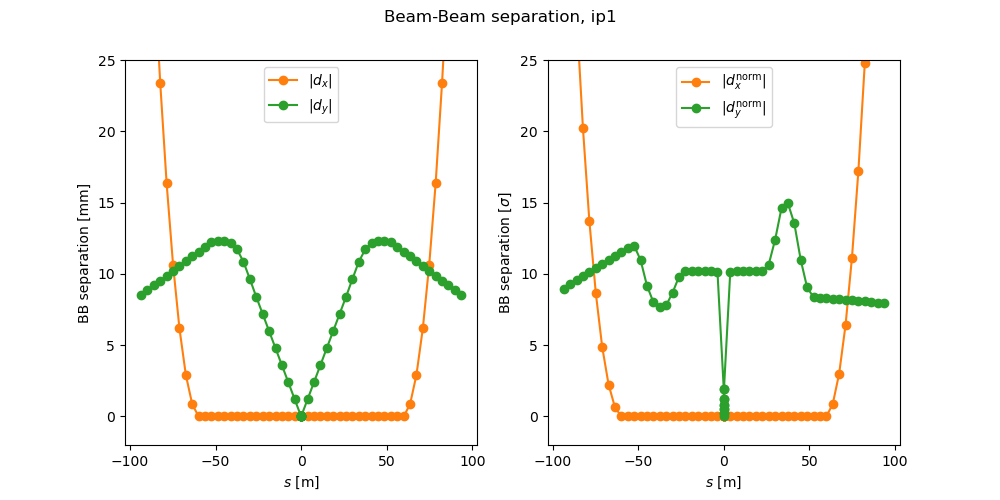

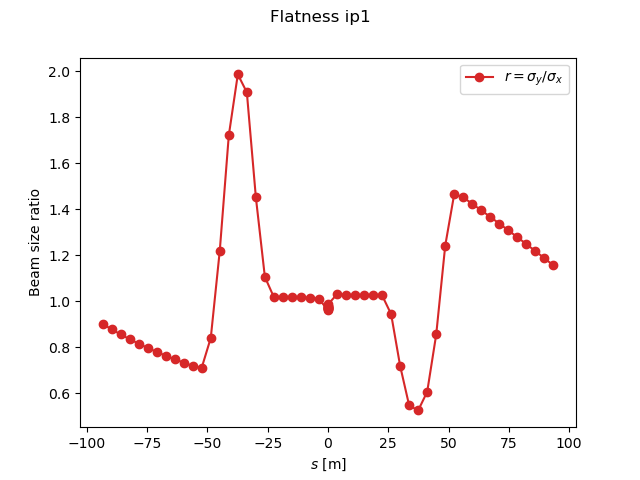

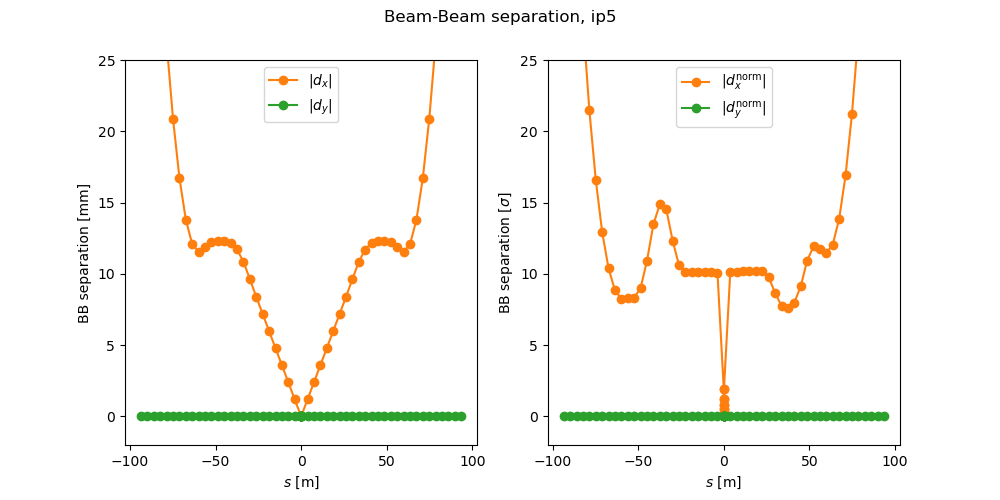

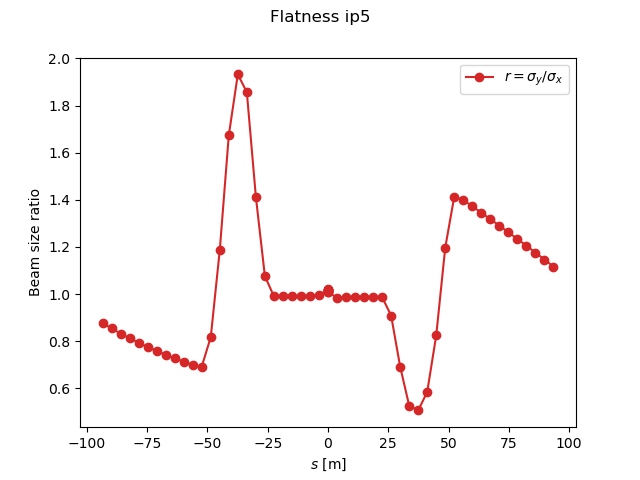

In [43]:
%matplotlib widget
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import Backend.InteractionPoint as inp

# Importing twiss and survey
twiss_b1  = pd.read_pickle('LHC_sequence/lhcb1_twiss.pkl')
survey_b1 = pd.read_pickle('LHC_sequence/lhcb1_survey.pkl')

twiss_b2  = pd.read_pickle('LHC_sequence/lhcb2_twiss.pkl')
survey_b2 = pd.read_pickle('LHC_sequence/lhcb2_survey.pkl')


B1 = inp.Beam('b1',twiss_b1,survey_b1,
              Nb       = 1.15e11,
              E        = 6.8e12,
              emittx_n = 2.5e-6,
              emitty_n = 2.5e-6,
              dp_p0    = 0)
    
B2 = inp.Beam('b2',twiss_b2,survey_b2,
              Nb       = 1.15e11,
              E        = 6.8e12,
              emittx_n = 2.5e-6,
              emitty_n = 2.5e-6,
              dp_p0    = 0)

IP1 = inp.InteractionPoint('ip1',B1,B2)
IP5 = inp.InteractionPoint('ip5',B1,B2)


for _IP in [IP1,IP5]:
    
    # Plotting   
    fig, axes = plt.subplots(1, 2,figsize=(10,5))
    fig.suptitle(f'Beam-Beam separation, {_IP.name}')
    
    plt.sca(axes[0])
    plt.plot(_IP.bb['s'],np.abs(_IP.bb['dx'])/1e-3,'-o',color='C1',label=r'$|d_x|$')
    plt.plot(_IP.bb['s'],np.abs(_IP.bb['dy'])/1e-3,'-o',color='C2',label=r'$|d_y|$')
    plt.legend()
    plt.xlabel(r'$s$ [m]')
    plt.ylabel('BB separation [mm]')
    plt.ylim([-2,25])
    
    plt.sca(axes[1])
    plt.plot(_IP.bb['s'],np.abs(_IP.bb['dx_n']),'-o',color='C1',label=r'$|d_x^\mathrm{norm}|$')
    plt.plot(_IP.bb['s'],np.abs(_IP.bb['dy_n']),'-o',color='C2',label=r'$|d_y^\mathrm{norm}|$')
    plt.legend()
    plt.xlabel(r'$s$ [m]')
    plt.ylabel(r'BB separation [$\sigma$]')
    plt.ylim([-2,25])
    
    fig = plt.figure()
    fig.suptitle(f'Flatness {_IP.name}')
    plt.plot(_IP.bb['s'],_IP.bb['r'],'-o',color='C3',label=r'$r = \sigma_y/\sigma_x$')
    plt.legend()
    plt.xlabel(r'$s$ [m]')
    plt.ylabel(r'Beam size ratio')